# **What Is Melanoma Skin Cancer? : Overview**

> > Melanoma, the most serious type of skin cancer, develops in the cells (melanocytes) that produce melanin — the pigment that gives your skin its color. 
> 
> > Melanoma can also form in your eyes and, rarely, inside your body, such as in your nose or throat.
> > 
> > Cancer starts when cells in the body begin to grow out of control. Cells in nearly any part of the body can become cancer, and can then spread to other areas of the body.
> 



# **Exact Cause:**

> The exact cause of all melanomas isn't clear, but exposure to ultraviolet (UV) radiation from sunlight or tanning lamps and beds increases your risk of developing melanoma. 
> 
> Limiting your exposure to UV radiation can help reduce your risk of melanoma.


# **Who are impacted:**

> The risk of melanoma seems to be increasing in **people under 40, especially women**. Knowing the warning signs of skin cancer can help ensure that cancerous changes are detected and treated before the cancer has spread. 
> 
> Melanoma can be treated successfully if it is detected early.
> 

# **Symptoms:**

The first melanoma signs and symptoms often are:

1. A change in an existing mole
2. The development of a new pigmented or unusual-looking growth on your skin


# **How Melanoma looks : **

The first sign of melanoma is often a mole that changes size, shape or color. This melanoma shows color variations and an irregular border, both of which are melanoma warning signs.

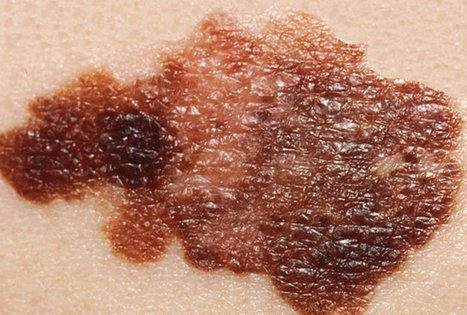



# **Are all skin tomours are Melanoma? Benign skin tumors**

**Many types of benign (non-cancerous) tumors can develop from different types of skin cells.**

Benign tumors that start in melanocytes

A mole (nevus) is a benign skin tumor that develops from melanocytes. Almost everyone has some moles. Nearly all moles (nevi) are harmless, but having some types can raise your risk of melanoma. 

# **Benign vs Malignant comparision:**
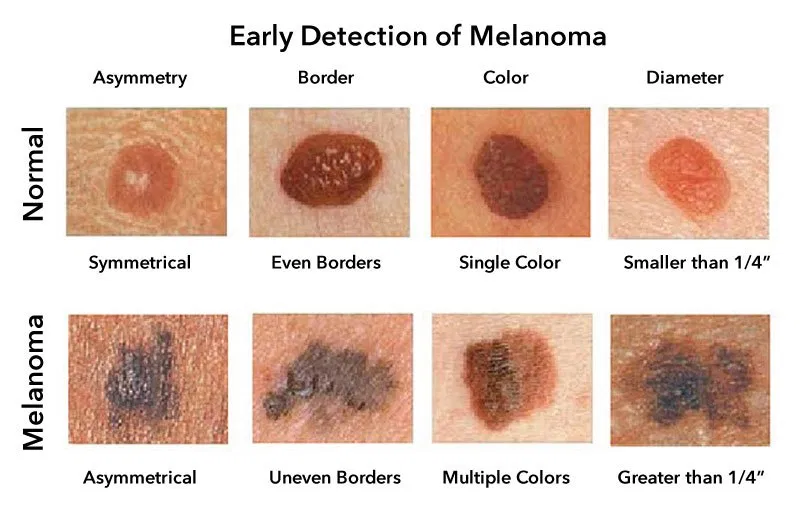

Source:

https://www.thepediablog.com/2019/12/05/preventing-melanoma/

https://www.cancer.org/cancer/melanoma-skin-cancer/about/what-is-melanoma.html

https://www.mayoclinic.org/diseases-conditions/melanoma/symptoms-causes/syc-20374884

# **Goal of this competition:**
> > 
> > Currently, dermatologists evaluate every one of a patient's moles to identify outlier lesions or “ugly ducklings” that are most likely to be melanoma. Existing AI approaches have not adequately considered this clinical frame of reference. Dermatologists could enhance their diagnostic accuracy if detection algorithms take into account “contextual” images within the same patient to determine which images represent a melanoma. If successful, classifiers would be more accurate and could better support dermatological clinic work.
> > 
> > 
> > In this competition, you’ll identify melanoma in images of skin lesions. In particular, you’ll use images within the same patient and determine which are likely to represent a melanoma. Using patient-level contextual information may help the development of image analysis tools, which could better support clinical dermatologists.
> > 
> > Melanoma is a deadly disease, but if caught early, most melanomas can be cured with minor surgery. Image analysis tools that automate the diagnosis of melanoma will improve dermatologists' diagnostic accuracy. Better detection of melanoma has the opportunity to positively impact millions of people.
> > 
> 

# **Evaluation Metric: Area under the ROC Curve: **# 

how much model is capable of distinguishing between classes. 

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

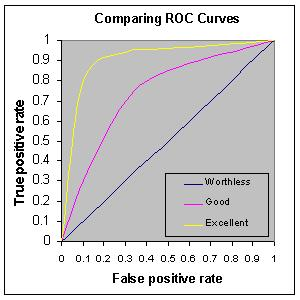



# **Data**# 

**1. Images in DICOM format**

> Digital Imaging and Communications in Medicine (DICOM) is the standard for the communication and management of medical imaging information and related data. 
> 
> DICOM is most commonly used for storing and transmitting medical images enabling the integration of medical imaging devices such as scanners, servers, workstations, printers, network hardware, and picture archiving and communication systems (PACS) from multiple manufacturers. 
> 
> It has been widely adopted by hospitals and is making inroads into smaller applications like dentists' and doctors' offices. (Source : Wiki)

**2. Images are provided in JPEG and TFRecord format:**

> TFRecord helps us storing large datasets in binary format. Takes up less space and training time can be improved 
> 
**3. Target : **

> The value 0 denotes benign, and 1 indicates malignant.
> 

**4. Features:**

> image_name - unique identifier, points to filename of related DICOM image

> patient_id - unique patient identifier

> sex - the sex of the patient (when unknown, will be blank)

> age_approx - approximate patient age at time of imaging

> anatom_site_general_challenge - location of imaged site

> diagnosis - detailed diagnosis information (train only)

> benign_malignant - indicator of malignancy of imaged lesion

> target - binarized version of the target variable



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# pd.set_option('display.max_rows', None)
import gc
import os

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import random
import cv2



In [ ]:
base_data_folder = "../input/siim-isic-melanoma-classification"


# **How does Train and test set looks like?**

In [ ]:
def read_train():
    train=pd.read_csv('../input/siim-isic-melanoma-classification/train.csv')
    print('Train set : Total Images are {} and columns are {}'.format(train.shape[0], train.shape[1])) 
    return train

def read_test():
    test=pd.read_csv('../input/siim-isic-melanoma-classification/test.csv')
    print('Train set : Total Images are {} and columns are {}'.format(test.shape[0], test.shape[1])) 
    return test

train_df = read_train()
test_df = read_test()

In [ ]:
train_df.tail(5)

In [ ]:
test_df.tail(5)

# **How many images in each directory?**

In [ ]:
import os
print(os.listdir("../input/siim-isic-melanoma-classification"))

In [ ]:

folder_path = os.path.join(base_data_folder, "jpeg")
all_data = os.listdir(folder_path)
for folders in all_data:
    files_in_path = os.path.join(folder_path, folders)
    count = len([cnt for cnt in os.scandir(files_in_path)])
    print('Jpeg Images from {} are : {}'.format(files_in_path, count)) 
    print("Size is " + str(round(os.path.getsize(files_in_path) / 1000000, 2)) + 'MB')

    

train_folder_path = os.path.join(base_data_folder, "train")
count = len([cnt for cnt in os.scandir(train_folder_path)])
print('\n\nDICOM Images from {} are : {}'.format(train_folder_path, count)) 
print("Size is " + str(round(os.path.getsize(train_folder_path) / 1000000, 2)) + 'MB')


test_folder_path = os.path.join(base_data_folder, "test")
count = len([cnt for cnt in os.scandir(test_folder_path)])
print('DICOM Images from {} are : {}'.format(test_folder_path, count)) 
print("Size is " + str(round(os.path.getsize(test_folder_path) / 1000000, 2)) + 'MB')




tf_folder_path = os.path.join(base_data_folder, "tfrecords")
count = len([cnt for cnt in os.scandir(tf_folder_path)])
print('\n\ntfrecords from {} are : {}'.format(tf_folder_path, count)) 


> So the images in the directory and the train and test dataframes are matching. Good to go

# **Basic Data Exploration**

> **Train Dataset** : Has Missing values on Sex, age_approx, anatom_site_general_challenge


> **Test Dataset** : Has missing values on anatom_site_general_challenge
> 

In [ ]:
train_df.info()

In [ ]:
train_df.isna().sum()

In [ ]:
test_df.info()

In [ ]:
test_df.isna().sum()

# **So whats the missing values all about?**

In [ ]:
train_df[train_df.sex.isna() == True]

In [ ]:
train_df[train_df.sex.isna() == True].patient_id.unique()


In [ ]:
train_df[train_df.age_approx.isna() == True].patient_id.unique()



# **Sex and age_approx **

** all the missing values belong to three patients : IP_5205991, IP_0550106, IP_9835712 **


In [ ]:
train_df[train_df.anatom_site_general_challenge.isna() == True].patient_id.count()


In [ ]:
train_df[train_df.anatom_site_general_challenge.isna() == True].patient_id.unique()


# **anatom_site_general_challenge**

Around 500+ patients dont have location captured


# **Lets see typically where skin issue develops across patients**

In [ ]:
train_df['anatom_site_general_challenge'].value_counts(normalize=True).sort_values().plot(kind='bar')


# **What features impact the target variable. **

In [ ]:
train_df.head()

In [ ]:
for cols in train_df.columns:
    if (cols != 'patient_id') and (cols != 'image_name'):
        plt.figure()
        train_df[cols].value_counts().head(10).plot(kind='bar',title=cols)

In [ ]:
# 1. Which gender is highly impacted? 
# 2. Which age people highly impacted?
# 3. by location where issue comes in?
# 4. what daignosis been done to them?

# **Which gender is highly impacted?**

In [ ]:
temp=train_df.groupby(['target','sex'])['benign_malignant'].count().to_frame().reset_index()
sns.catplot(x='target',y='benign_malignant', hue='sex',data=temp,kind='bar')

# **Which age people are highly impacted?**

In [ ]:
sns.stripplot(x="sex", y="age_approx", hue="benign_malignant", data=train_df,jitter=0.20);

# **Where infection grows by gender**

In [ ]:
temp=train_df.groupby(['anatom_site_general_challenge','sex','benign_malignant'])['target'].count().to_frame().reset_index()
temp

In [ ]:
temp=train_df.groupby(['anatom_site_general_challenge','sex','benign_malignant','diagnosis'])['target'].count().to_frame().reset_index()
temp

In [ ]:
train_df.head()

# # **Initial Intuitions**


> how benign vs malignant mole looks like? 

> how mole varies between locations and how it looks in real world?

> how similar it is between gender?


In [ ]:
def show_images(df, base_data_folder, what_to_show):
    n_row, n_col = 3,3
    img_dir = base_data_folder+what_to_show
    
    _, axs = plt.subplots(n_row, n_col, figsize=(10, 10))
    axs = axs.flatten()
    
    for ax in axs:
        random_image = np.random.choice(df+'.jpg')
        img = cv2.imread(os.path.join(img_dir, random_image),cv2.IMREAD_COLOR)
        ax.imshow(img)
    plt.show()
    plt.tight_layout()  
    
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    gc.collect()

# **How Benign skin tone and the mole looks like**

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[train_df['benign_malignant'] == 'benign']['image_name'].values
show_images(what_images, base_data_folder, what_to_show)



# **How Malignant Mole and skin tone looks like**

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[train_df['benign_malignant'] == 'malignant']['image_name'].values
show_images(what_images, base_data_folder, what_to_show)

# **How Melanoma looks when it affects by gender (Benign - male)**

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[(train_df['benign_malignant'] == 'benign') & (train_df['sex'] == 'male')]['image_name'].values
show_images(what_images, base_data_folder, what_to_show)


# **How Melanoma looks when it affects by gender (Benign - female)**

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[(train_df['benign_malignant'] == 'benign') & (train_df['sex'] == 'female')]['image_name'].values
show_images(what_images, base_data_folder, what_to_show)


# **How Melanoma looks when it affects by gender (malignant - male)**

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[(train_df['benign_malignant'] == 'malignant') & (train_df['sex'] == 'male')]['image_name'].values
show_images(what_images, base_data_folder, what_to_show)

# **How Melanoma looks when it affects by gender (malignant - female)**

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[(train_df['benign_malignant'] == 'malignant') & (train_df['sex'] == 'female')]['image_name'].values
show_images(what_images, base_data_folder, what_to_show)

In [ ]:
train_df.head(5)

In [ ]:
train_df['anatom_site_general_challenge'].value_counts()

# **How it looks when the impact happens on oral/genital (Benign vs Malignant)**

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[(train_df['benign_malignant'] == 'benign') & (train_df['anatom_site_general_challenge'] == 'oral/genital')]['image_name'].values
show_images(what_images, base_data_folder, what_to_show)

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[(train_df['benign_malignant'] == 'malignant') & (train_df['anatom_site_general_challenge'] == 'oral/genital')]['image_name'].values
show_images(what_images, base_data_folder, what_to_show)

# **How it looks when the impact happens on palms/soles  (Benign vs Malignant)**

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[(train_df['benign_malignant'] == 'benign') & (train_df['anatom_site_general_challenge'] == 'palms/soles')]['image_name'].values
show_images(what_images, base_data_folder, what_to_show)

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[(train_df['benign_malignant'] == 'malignant') & (train_df['anatom_site_general_challenge'] == 'palms/soles')]['image_name'].values
show_images(what_images, base_data_folder, what_to_show)

# **How it looks when the impact happens on head/neck  (Benign vs Malignant)**

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[(train_df['benign_malignant'] == 'benign') & (train_df['anatom_site_general_challenge'] == 'head/neck')]['image_name'].values
show_images(what_images, base_data_folder, what_to_show)

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[(train_df['benign_malignant'] == 'malignant') & (train_df['anatom_site_general_challenge'] == 'head/neck')]['image_name'].values
show_images(what_images, base_data_folder, what_to_show)

# **How it looks when the impact happens on upper extremity (Benign vs Malignant)**

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[(train_df['benign_malignant'] == 'benign') & (train_df['anatom_site_general_challenge'] == 'upper extremity')]['image_name'].values
show_images(what_images, base_data_folder, what_to_show)

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[(train_df['benign_malignant'] == 'malignant') & (train_df['anatom_site_general_challenge'] == 'upper extremity')]['image_name'].values
show_images(what_images, base_data_folder, what_to_show)

# **How it looks when the impact happens on lower extremity (Benign vs Malignant)**

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[(train_df['benign_malignant'] == 'benign') & (train_df['anatom_site_general_challenge'] == 'lower extremity')]['image_name'].values
show_images(what_images, base_data_folder, what_to_show)

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[(train_df['benign_malignant'] == 'malignant') & (train_df['anatom_site_general_challenge'] == 'lower extremity')]['image_name'].values
show_images(what_images, base_data_folder, what_to_show)

# **How it looks when the impact happens on torso (Benign vs Malignant)**

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[(train_df['benign_malignant'] == 'benign') & (train_df['anatom_site_general_challenge'] == 'torso')]['image_name'].values
show_images(what_images, base_data_folder, what_to_show)

In [ ]:
what_to_show = "/jpeg/train"
what_images = train_df[(train_df['benign_malignant'] == 'malignant') & (train_df['anatom_site_general_challenge'] == 'torso')]['image_name'].values
show_images(what_images, base_data_folder, what_to_show)

# **Removing Noise from Malignant Melanomas
# in what segments milanoma categorized
# **

In [ ]:
train_df.head()

In [ ]:
malignant_images = train_df[train_df['benign_malignant'] == 'malignant']

In [ ]:
what_to_show = "/jpeg/train"
what_images = malignant_images['image_name'].values
show_images(what_images, base_data_folder, what_to_show)



In [ ]:
# import numpy 
# from matplotlib import pyplot as plt

# def gaussian_kernel(size, size_y=None):
#     size = int(size)
#     if not size_y:
#         size_y = size
#     else:
#         size_y = int(size_y)
#     x, y = numpy.mgrid[-size:size+1, -size_y:size_y+1]
#     g = numpy.exp(-(x**2/float(size)+y**2/float(size_y)))
#     return g / g.sum()

# **Lets see if we have any noise on the image we process**

In [ ]:
# malignant_images.groupby(['sex','age_approx'])['target'].value_counts()

file_path = "../input/siim-isic-melanoma-classification//jpeg/train/ISIC_0080817.jpg"
img = cv2.imread(file_path,cv2.IMREAD_COLOR)

kernel = np.ones((3,3), np.float32) / 9
filt_2D = cv2.filter2D(img, -1, kernel)
blur = cv2.blur(img,(3,3))
gaussian_blur = cv2.GaussianBlur(img, (3,3),0)
median_blur = cv2.medianBlur(img, 3)
bilateral_blur = cv2.bilateralFilter(img, 9, 75, 75)

n_row, n_col = 2,3

_, axs = plt.subplots(n_row, n_col, figsize=(11, 5))
axs = axs.flatten()
    
axs[0].imshow(img)
axs[1].imshow(filt_2D)
axs[2].imshow(blur)
axs[3].imshow(gaussian_blur)
axs[4].imshow(median_blur)
axs[5].imshow(bilateral_blur)





# **Lets see how the edge looks like**

In [ ]:
# malignant_images.groupby(['sex','age_approx'])['target'].value_counts()

img = cv2.imread(file_path,cv2.IMREAD_COLOR)
img_edges = cv2.Canny(img, 75, 75)


n_row, n_col = 1,2

_, axs = plt.subplots(n_row, n_col, figsize=(11, 5))
axs = axs.flatten()
    
axs[0].imshow(img)
axs[1].imshow(img_edges)





# **Work in progress**